In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [4]:
test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,...,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,...,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,A,N,C,A,F,AB,A,AH,BC,...,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,B,L,C,A,F,BI,A,E,AX,...,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,A,F,A,B,F,BI,A,AH,I,...,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [5]:
train_index = train["id"]
test_index = test["id"]

In [6]:
train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cat10   300000 non-null  object 
 11  cat11   300000 non-null  object 
 12  cat12   300000 non-null  object 
 13  cat13   300000 non-null  object 
 14  cat14   300000 non-null  object 
 15  cat15   300000 non-null  object 
 16  cat16   300000 non-null  object 
 17  cat17   300000 non-null  object 
 18  cat18   300000 non-null  object 
 19  cont0   300000 non-null  float64
 20  cont1   300000 non-null  float64
 21  cont2   30

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    200000 non-null  object 
 1   cat1    200000 non-null  object 
 2   cat2    200000 non-null  object 
 3   cat3    200000 non-null  object 
 4   cat4    200000 non-null  object 
 5   cat5    200000 non-null  object 
 6   cat6    200000 non-null  object 
 7   cat7    200000 non-null  object 
 8   cat8    200000 non-null  object 
 9   cat9    200000 non-null  object 
 10  cat10   200000 non-null  object 
 11  cat11   200000 non-null  object 
 12  cat12   200000 non-null  object 
 13  cat13   200000 non-null  object 
 14  cat14   200000 non-null  object 
 15  cat15   200000 non-null  object 
 16  cat16   200000 non-null  object 
 17  cat17   200000 non-null  object 
 18  cat18   200000 non-null  object 
 19  cont0   200000 non-null  float64
 20  cont1   200000 non-null  float64
 21  cont2   20

In [9]:
cat_features = [i for i in train.select_dtypes("object")]
numeric_features = [i for i in train.select_dtypes("float64")]
target_feature = list(train.columns[-1:])
print(f"Categorical features are: {cat_features}.\nNumeric features are: {numeric_features}.\nTarget varaible is: {target_feature}")

Categorical features are: ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18'].
Numeric features are: ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10'].
Target varaible is: ['target']


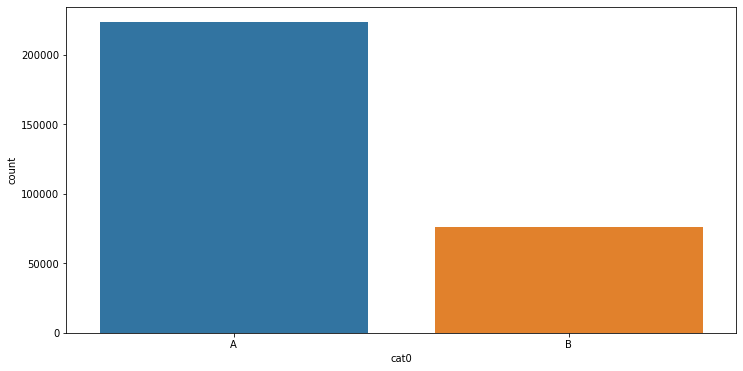

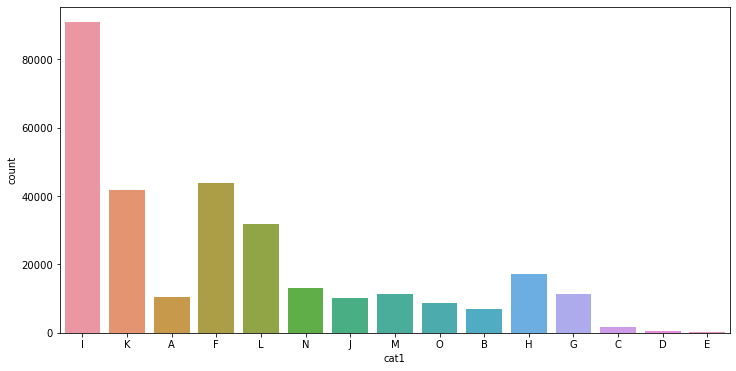

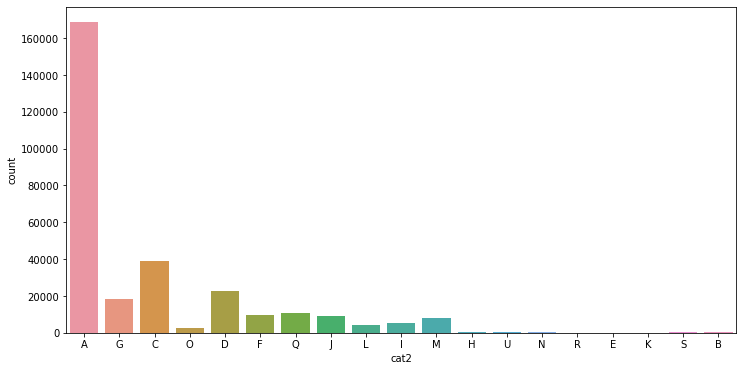

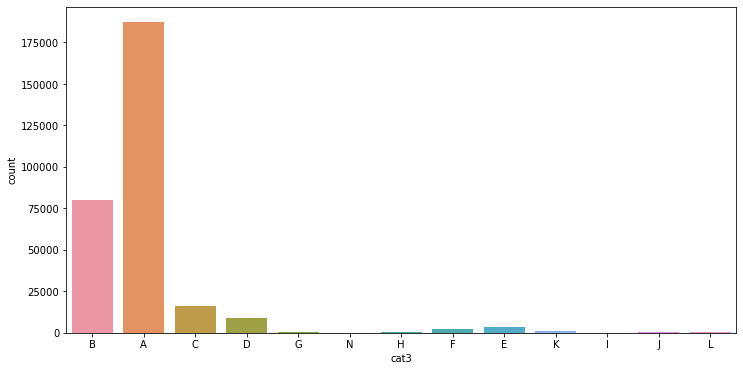

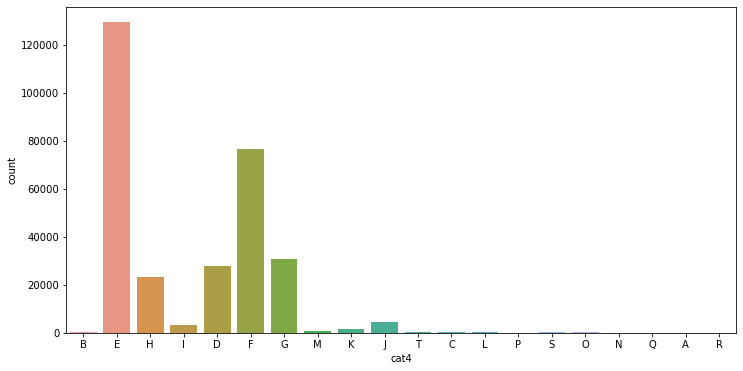

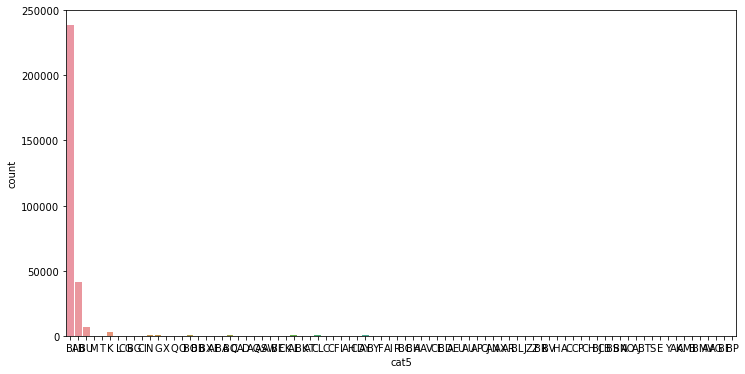

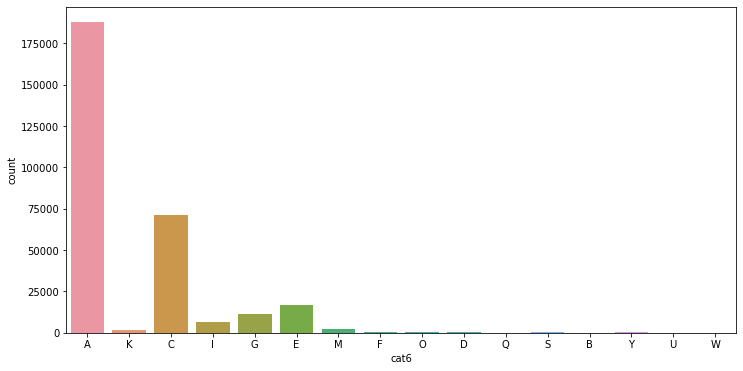

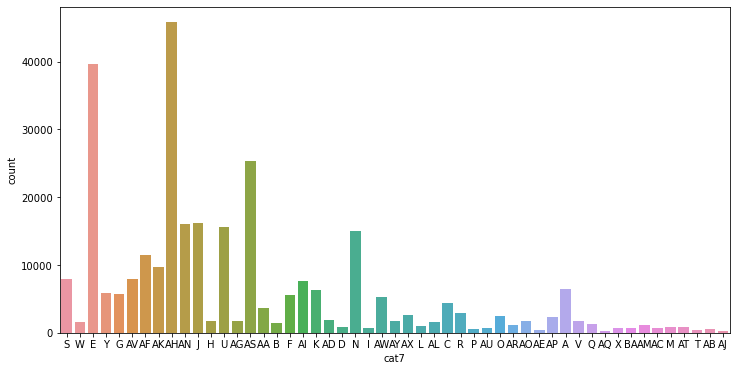

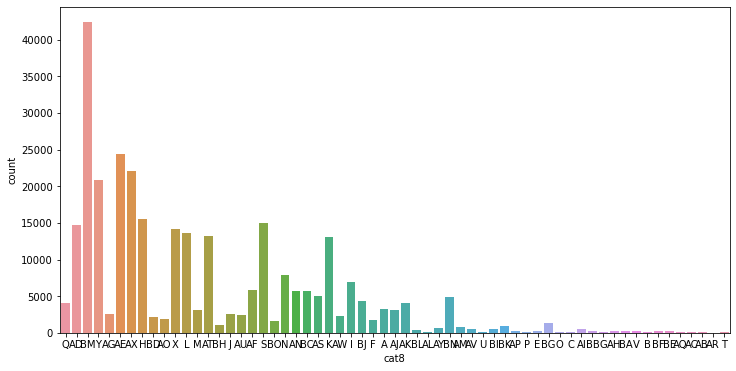

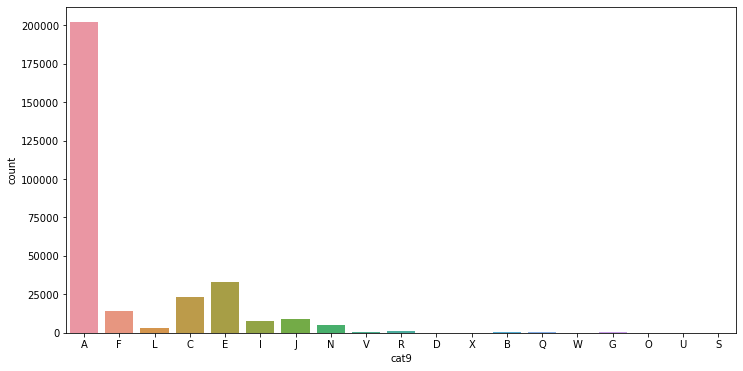

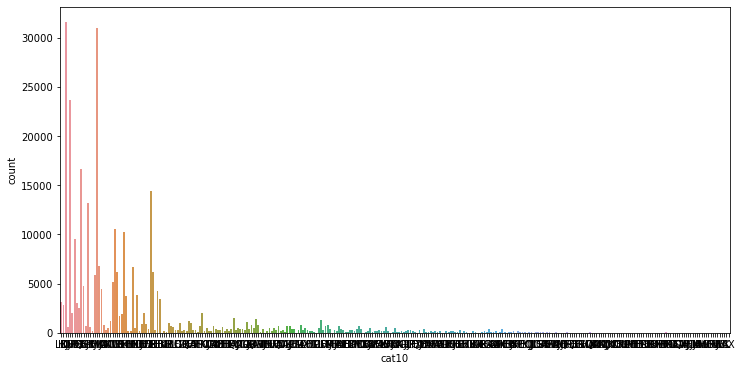

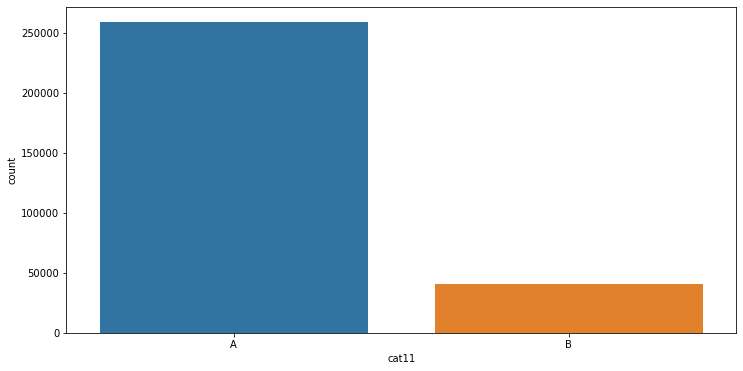

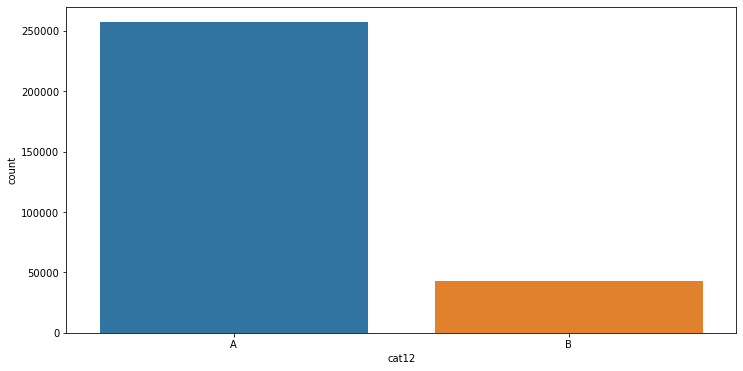

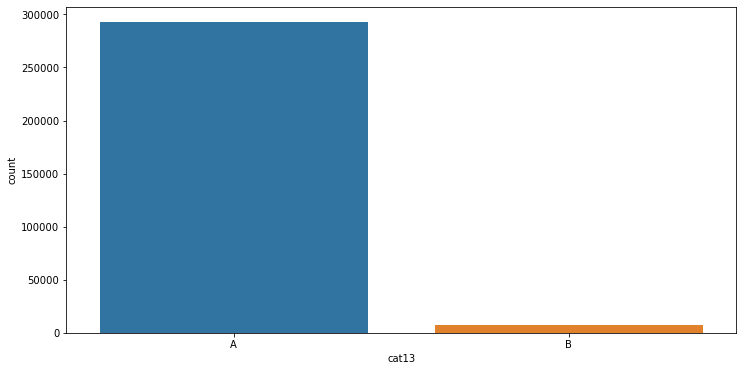

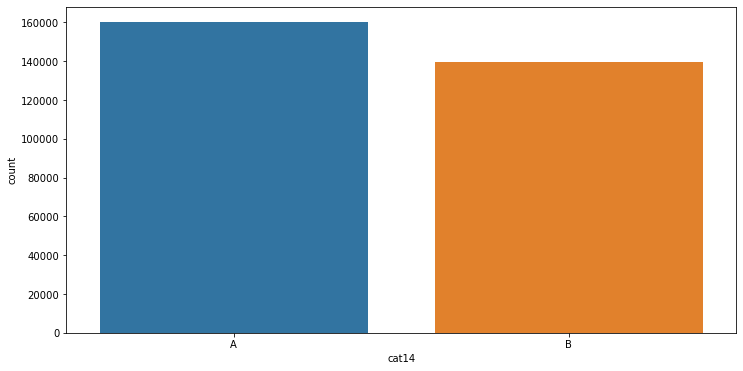

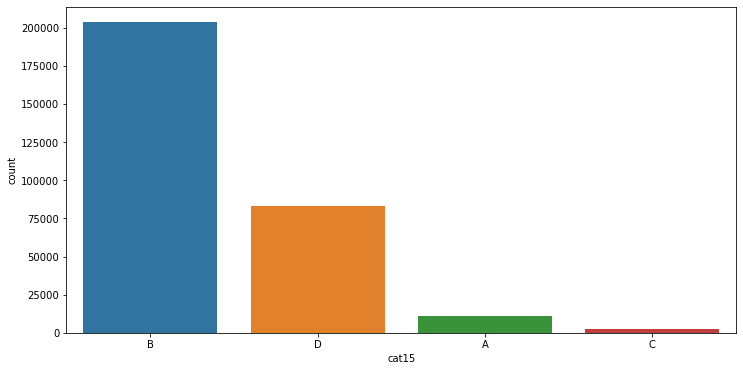

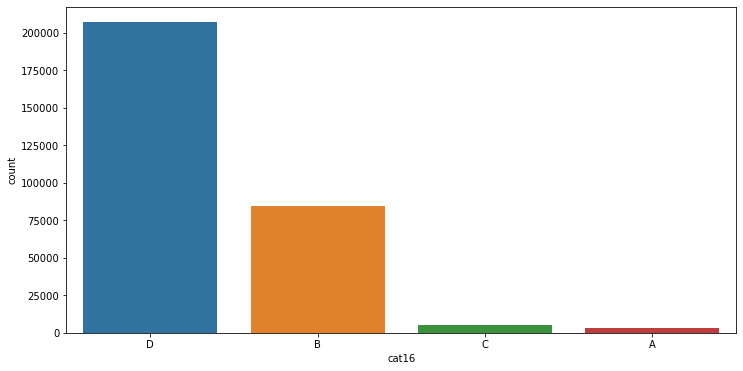

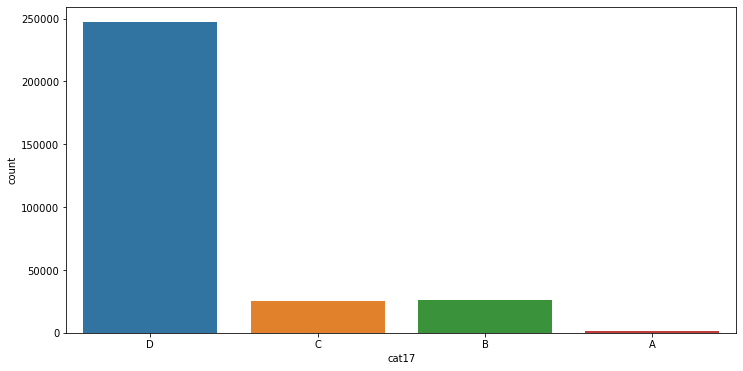

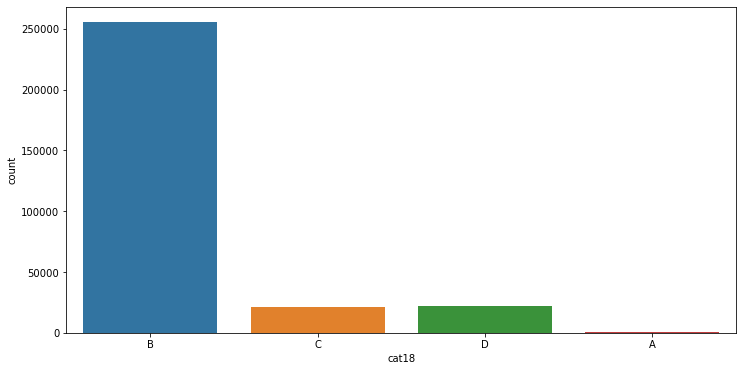

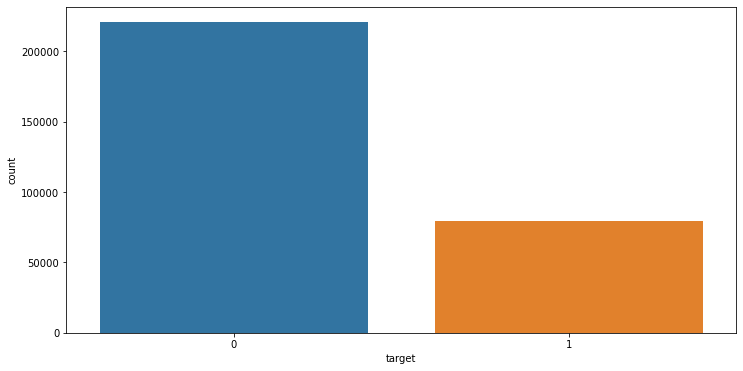

In [10]:
cat_and_target = cat_features + target_feature
for i in train[cat_and_target]:
    plt.figure(figsize = (12,6))
    sns.countplot(x = i, data = train)
    plt.show()

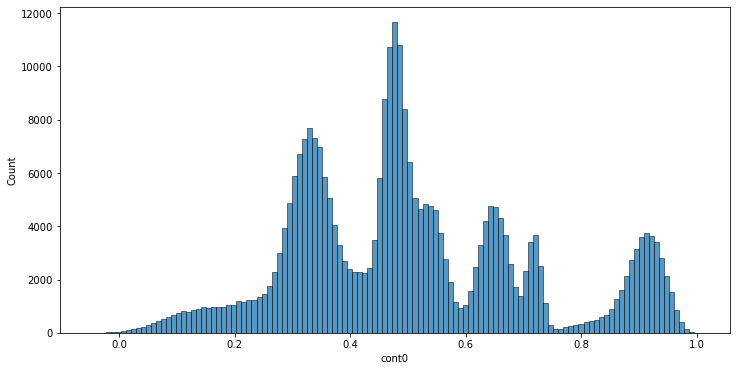

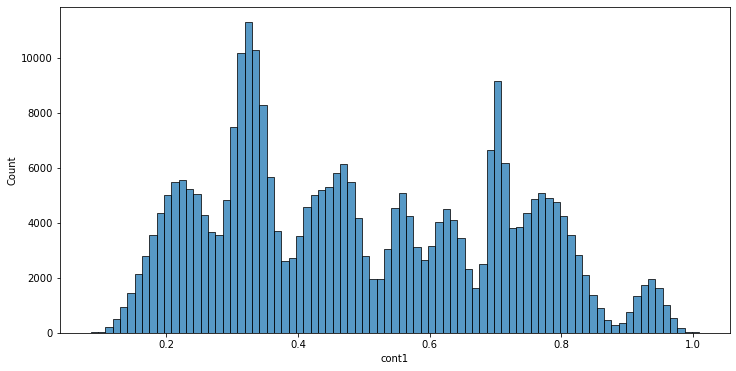

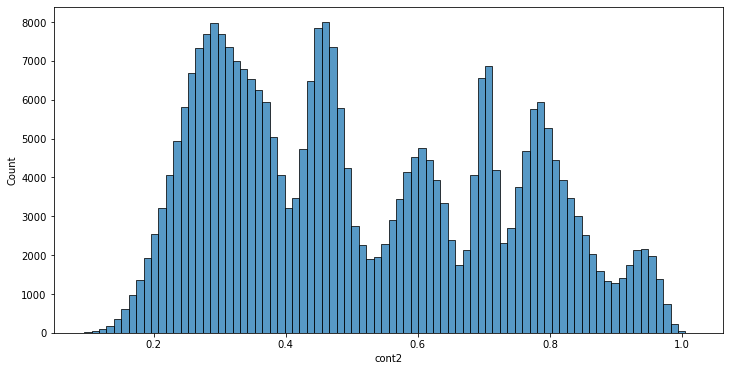

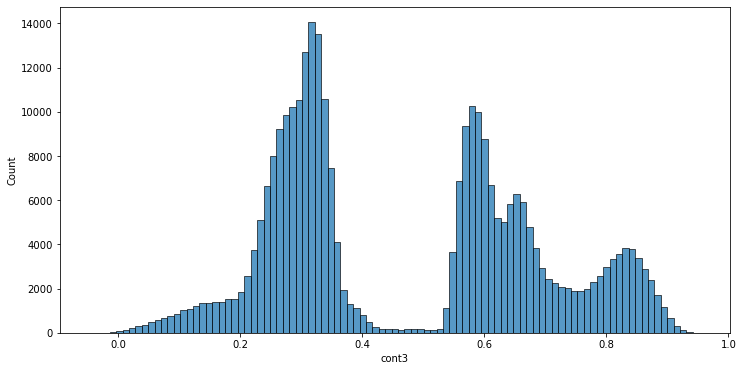

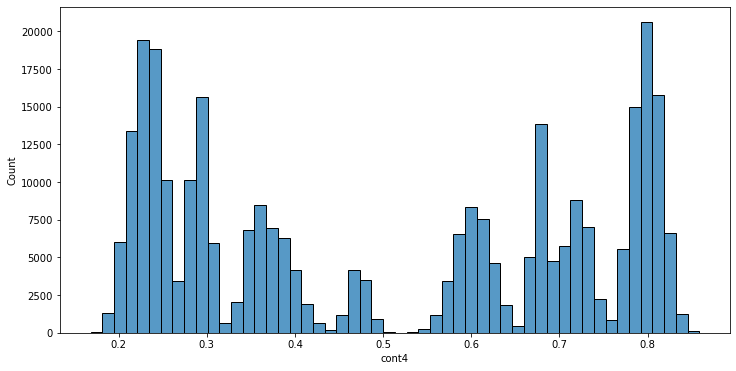

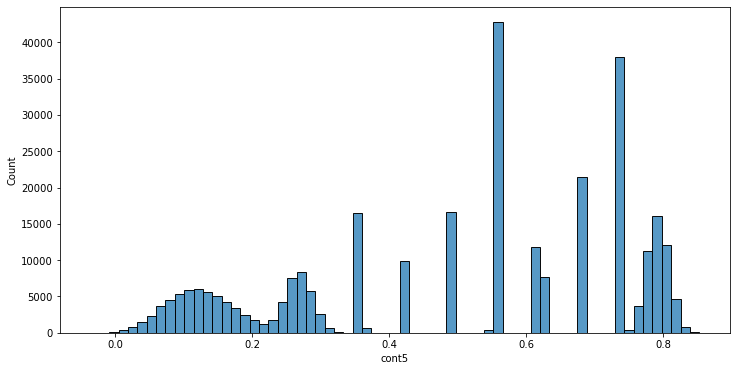

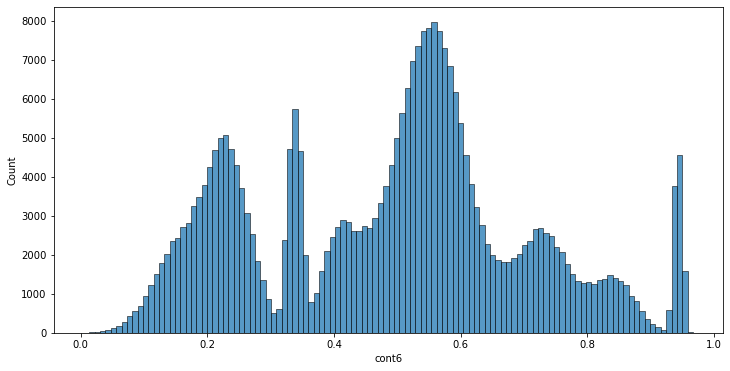

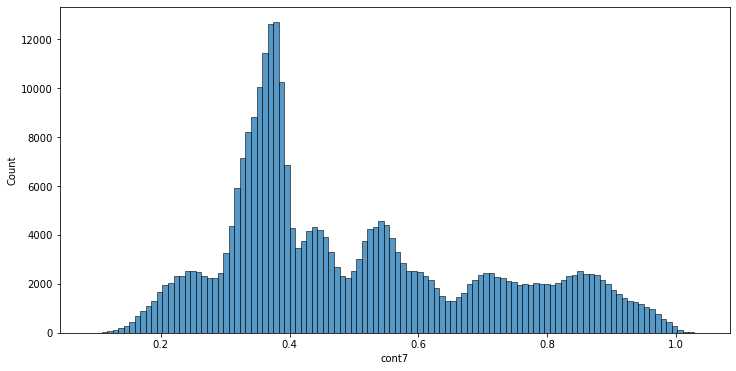

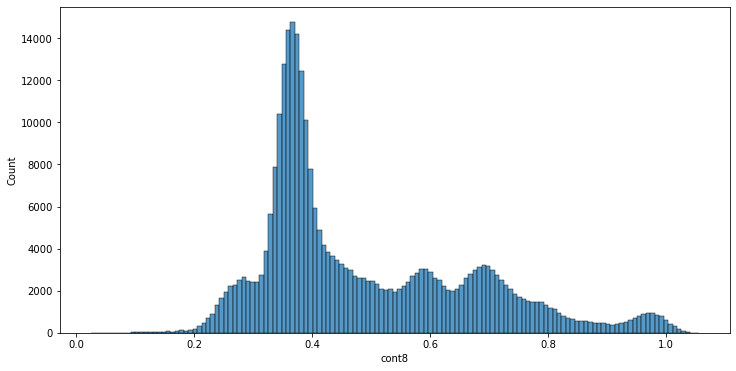

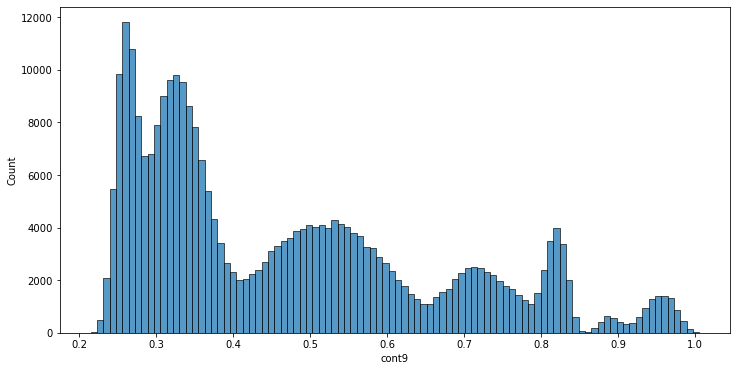

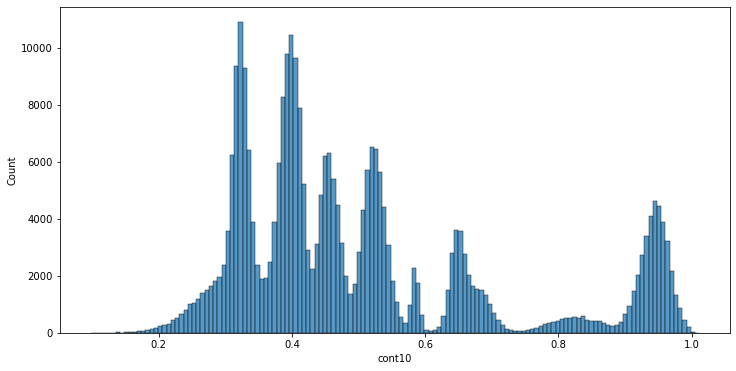

In [11]:
for i in train[numeric_features]:
    plt.figure(figsize = (12,6))
    sns.histplot(x = i, data = train)
    plt.show()

## Modeling (NN)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [14]:
X = train[cat_features + numeric_features]
y = train[target_feature]

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = .75, test_size = .25, random_state = 42)

In [16]:
cat_transformer = OneHotEncoder(sparse = False, handle_unknown = "ignore")
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer([
    ("cat_transform", cat_transformer, cat_features),
    ("numeric_transform", numeric_transformer, numeric_features)
])

In [17]:
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
input_shape = [X_val.shape[1]]
input_shape

[632]

In [18]:
y_train = np.array(y_train).flatten()
y_val = np.array(y_val).flatten()

In [19]:
test = preprocessor.transform(test)

In [20]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape = input_shape),
    layers.Dense(units = 64, activation = "relu"),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.3),
    layers.Dense(units = 64, activation = "relu"),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.3),
    layers.Dense(units = 64, activation = "relu"),
    layers.BatchNormalization(),
    layers.Dropout(rate = 0.3),
    layers.Dense(1, activation = "sigmoid")
])

In [21]:
early_stopping = keras.callbacks.EarlyStopping(
    patience = 20,
    min_delta = 0.001,
    restore_best_weights = True,
)

In [22]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["binary_accuracy"])

In [23]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 512, epochs = 100, callbacks = early_stopping)

Epoch 1/100
440/440 [==============================] - 5s 9ms/step - loss: 0.5111 - binary_accuracy: 0.7690 - val_loss: 0.3575 - val_binary_accuracy: 0.8459
Epoch 2/100
440/440 [==============================] - 3s 8ms/step - loss: 0.3751 - binary_accuracy: 0.8395 - val_loss: 0.3538 - val_binary_accuracy: 0.8479
Epoch 3/100
440/440 [==============================] - 3s 8ms/step - loss: 0.3671 - binary_accuracy: 0.8427 - val_loss: 0.3529 - val_binary_accuracy: 0.8483
Epoch 4/100
440/440 [==============================] - 3s 8ms/step - loss: 0.3614 - binary_accuracy: 0.8444 - val_loss: 0.3513 - val_binary_accuracy: 0.8489
Epoch 5/100
440/440 [==============================] - 3s 7ms/step - loss: 0.3574 - binary_accuracy: 0.8459 - val_loss: 0.3506 - val_binary_accuracy: 0.8494
Epoch 6/100
440/440 [==============================] - 3s 8ms/step - loss: 0.3527 - binary_accuracy: 0.8482 - val_loss: 0.3516 - val_binary_accuracy: 0.8497
Epoch 7/100
440/440 [==============================] - 3s 

<AxesSubplot:title={'center':'Accuracy'}>

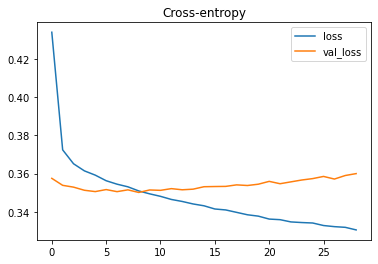

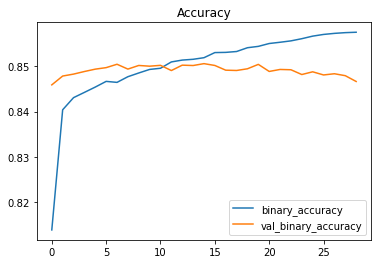

In [24]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ["loss", "val_loss"]].plot(title = "Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title = "Accuracy")

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 632)               2528      
_________________________________________________________________
dense (Dense)                (None, 64)                40512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [26]:
y_pred = model.predict(test)
y_pred = y_pred.flatten().tolist()

In [27]:
results_df = pd.DataFrame({"id": test_index, "target": y_pred})
results_df

,id,target
0,5,0.144376
1,6,0.363766
2,8,0.026143
3,9,0.151983
4,11,0.081891
...,...,...
199995,499983,0.839045
199996,499984,0.037798
199997,499987,0.638775
199998,499994,0.098151


In [28]:
results_df.to_csv("nn_submission.csv")